# Выпускная квалификационная работа - 5 Написать нейронную сеть

1. Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

In [1]:
import warnings; warnings.filterwarnings('ignore')
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
logging.getLogger('tensorflow').setLevel(logging.FATAL)

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential      # последовательная модель
from tensorflow.keras.models import load_model
from tensorflow.keras        import layers
from tensorflow.keras.layers import Dense           # полносвязный слой
from tensorflow.keras.layers import Dropout

## Загрузка данных

In [2]:
df = pd.read_excel('data/data_outliers_cleaned.xlsx', index_col=0)
df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [3]:
df.shape

(936, 13)

In [4]:
# Определим входы и выход для модели

target_var = df['Соотношение матрица-наполнитель']
train_vars = df.loc[:, df.columns != 'Соотношение матрица-наполнитель']

# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(train_vars, target_var, test_size=0.3, random_state=14)

In [5]:
# нормализация
# This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1.
#  It enables smoother gradients, faster training, and better generalization accuracy.
x_train_normalizer = tf.keras.layers.Normalization(axis=-1)
x_train_normalizer.adapt(np.array(x_train))

In [6]:
# Сконфигурируем модель, зададим слои
# In regression models, ‘relu’ is generally used in the hidden layers, 
# and ‘linear’ activation functions are used in the output layer, 
# if the regression is not logistic.

model = tf.keras.Sequential([
    x_train_normalizer, 
    
    layers.Dense((x_train.shape[1] * 16), activation='relu', name='Hidden-1'), 
    # layers.Dropout(0.2, input_shape=(2,), name='Dropout-1-.2'),
    layers.Dense((x_train.shape[1] * 4), activation='relu', name='Hidden-2'), 
    # layers.Dropout(0.2, input_shape=(2,), name='Dropout-2-.2'),
    layers.Dense(1, activation='linear', name='Output'),                                                  
])

#  The ‘mse’ loss function is usually in regression models.
# model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')
model.compile(optimizer='rmsprop' , loss='mean_squared_error' , metrics=['mae'])

In [7]:
# Архитектура модели

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 Hidden-1 (Dense)            (None, 192)               2496      
                                                                 
 Hidden-2 (Dense)            (None, 48)                9264      
                                                                 
 Output (Dense)              (None, 1)                 49        
                                                                 
Total params: 11,834
Trainable params: 11,809
Non-trainable params: 25
_________________________________________________________________


In [8]:
# Обучим модель

model_hist = model.fit(x_train, y_train, epochs=10, verbose=2, validation_split = 0.3)

Epoch 1/10
15/15 - 0s - loss: 3.6448 - mae: 1.6266 - val_loss: 1.2156 - val_mae: 0.9000 - 482ms/epoch - 32ms/step
Epoch 2/10
15/15 - 0s - loss: 0.9859 - mae: 0.8042 - val_loss: 1.1771 - val_mae: 0.8933 - 32ms/epoch - 2ms/step
Epoch 3/10
15/15 - 0s - loss: 0.9258 - mae: 0.7837 - val_loss: 1.1345 - val_mae: 0.8920 - 32ms/epoch - 2ms/step
Epoch 4/10
15/15 - 0s - loss: 0.8654 - mae: 0.7581 - val_loss: 1.1681 - val_mae: 0.9104 - 32ms/epoch - 2ms/step
Epoch 5/10
15/15 - 0s - loss: 0.8322 - mae: 0.7455 - val_loss: 1.1141 - val_mae: 0.8893 - 33ms/epoch - 2ms/step
Epoch 6/10
15/15 - 0s - loss: 0.7854 - mae: 0.7235 - val_loss: 1.1260 - val_mae: 0.8919 - 32ms/epoch - 2ms/step
Epoch 7/10
15/15 - 0s - loss: 0.7493 - mae: 0.7064 - val_loss: 1.1149 - val_mae: 0.8814 - 32ms/epoch - 2ms/step
Epoch 8/10
15/15 - 0s - loss: 0.6986 - mae: 0.6826 - val_loss: 1.1155 - val_mae: 0.8795 - 32ms/epoch - 2ms/step
Epoch 9/10
15/15 - 0s - loss: 0.6944 - mae: 0.6768 - val_loss: 1.1689 - val_mae: 0.9094 - 31ms/epoch -

In [9]:
# Потери модели

model_hist.history

{'loss': [3.644834280014038,
  0.9859477281570435,
  0.9258206486701965,
  0.8653852343559265,
  0.832177460193634,
  0.785352885723114,
  0.7493063807487488,
  0.6985556483268738,
  0.6944386959075928,
  0.6591266989707947],
 'mae': [1.6265932321548462,
  0.8041728138923645,
  0.783728301525116,
  0.7581407427787781,
  0.7455348372459412,
  0.7235069870948792,
  0.7063896059989929,
  0.6826254725456238,
  0.6768320798873901,
  0.6589332818984985],
 'val_loss': [1.2156450748443604,
  1.1770588159561157,
  1.1344603300094604,
  1.1681493520736694,
  1.1140642166137695,
  1.126034140586853,
  1.114915132522583,
  1.1154676675796509,
  1.168880581855774,
  1.1168863773345947],
 'val_mae': [0.8999672532081604,
  0.8933343291282654,
  0.8919818997383118,
  0.9103712439537048,
  0.889252245426178,
  0.891857922077179,
  0.8813869953155518,
  0.8795104026794434,
  0.9094343781471252,
  0.8844707608222961]}

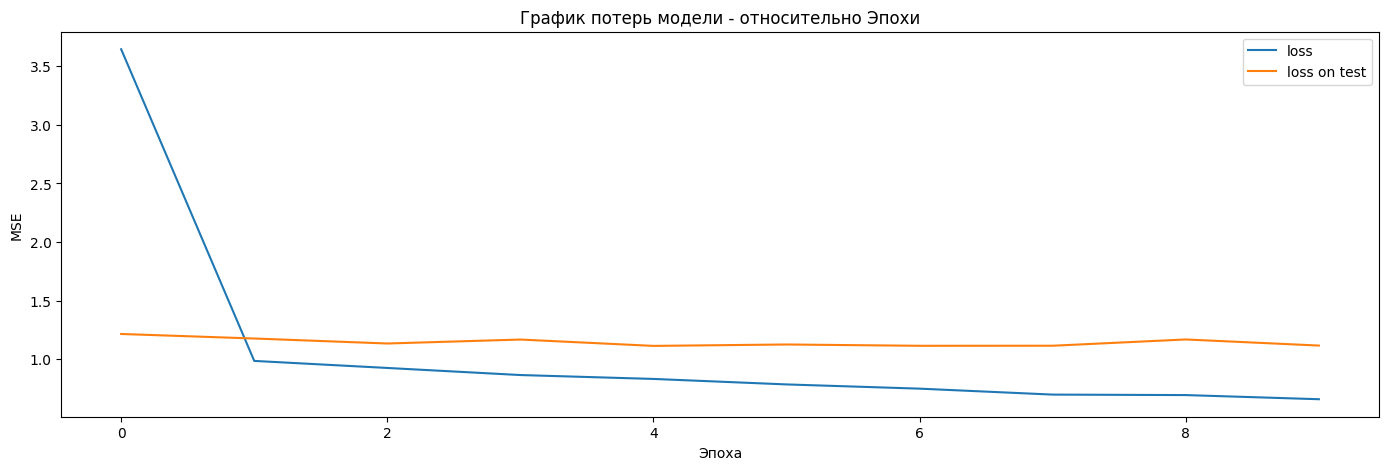

In [10]:
# Отрисовка потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist):
    plt.figure(figsize=(17,5))
    plt.plot(model_hist.history['loss'])
    plt.plot(model_hist.history['val_loss'])
    plt.title('График потерь модели - относительно Эпохи')
    plt.ylabel('MSE')
    plt.xlabel('Эпоха')
    plt.legend(['loss', 'loss on test'], loc='best')
    plt.show()
model_loss_plot(model_hist)

In [11]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей

def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label='Тест')
    plt.plot(predict, label='Прогноз')
    plt.legend(loc='best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()


9/9 [==============================] - 0s 726us/step


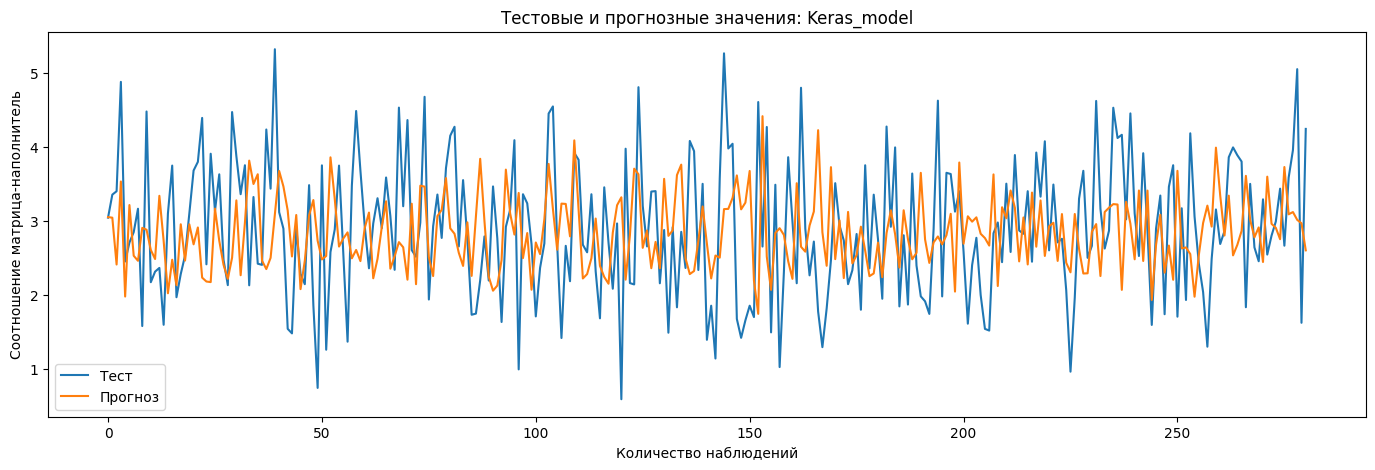

In [12]:
# Отрисуем результат работы модели

actual_and_predicted_plot(y_test.values, model.predict(x_test.values), 'Соотношение матрица-наполнитель', 'Keras_model')

In [13]:
# оценка модели MSE
mse_nn, mae_nn = model.evaluate(x_test, y_test, verbose=1)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

9/9 [==============================] - 0s 1ms/step - loss: 1.0950 - mae: 0.8599
Mean squared error on test data:  1.0950413942337036
Mean absolute error on test data:  0.8598676323890686


In [14]:
print(F'MSE: {mean_squared_error(y_test, model.predict(x_test.values)):.4f} , R2: {r2_score(y_test, model.predict(x_test.values)):.4f}')

9/9 [==============================] - 0s 774us/step
MSE: 1.0950 , R2: -0.3022


In [15]:
model.save('model/my_keras_model')

INFO:tensorflow:Assets written to: model/my_keras_model/assets


INFO:tensorflow:Assets written to: model/my_keras_model/assets


In [16]:

m = load_model('model/my_keras_model')
m.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 Hidden-1 (Dense)            (None, 192)               2496      
                                                                 
 Hidden-2 (Dense)            (None, 48)                9264      
                                                                 
 Output (Dense)              (None, 1)                 49        
                                                                 
Total params: 11,834
Trainable params: 11,809
Non-trainable params: 25
_________________________________________________________________


In [17]:
m.weights

[<tf.Variable 'mean:0' shape=(12,) dtype=float32, numpy=
 array([1973.0605   ,  741.70575  ,  111.28362  ,   22.206017 ,
         286.04895  ,  490.849    ,   73.33168  , 2470.2708   ,
         215.27907  ,   45.755722 ,    6.8643894,   57.48952  ],
       dtype=float32)>,
 <tf.Variable 'variance:0' shape=(12,) dtype=float32, numpy=
 array([5.0779165e+03, 1.0743080e+05, 7.4003314e+02, 6.0251102e+00,
        1.5916606e+03, 7.9864117e+04, 9.3165226e+00, 2.2316891e+05,
        3.5265742e+03, 2.0244287e+03, 6.1740403e+00, 1.2727345e+02],
       dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=655>,
 <tf.Variable 'Hidden-1/kernel:0' shape=(12, 192) dtype=float32, numpy=
 array([[ 0.01366249, -0.15691918, -0.1754222 , ...,  0.08538903,
         -0.12192764,  0.03328538],
        [ 0.05493055, -0.01242972, -0.02956059, ..., -0.11617158,
         -0.10259717,  0.1795342 ],
        [-0.14348923, -0.16733588,  0.05430266, ...,  0.09877569,
          0.16137955,  0.07180681],
